In [13]:
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from models.data import DataManager
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

manager = DataManager('../../configs/xdpole.yml')
manager.extract()
transformed = manager.transform()
transformed.create_level_label()

# split train/test data
X_train, X_test, y_train, y_test = train_test_split(transformed.X, transformed.y, test_size=0.33, random_state=42)

/home/arthur/projects/curriculum-learning/experiments/specialist


In [21]:

clf = MLPClassifier(
    hidden_layer_sizes=(6,6,5),
    alpha=0.001,
    max_iter=2000,
    solver='sgd',
    verbose=10,
    random_state=42,
    tol=0.000005
)

clf.fit(X_train, y_train)

filename = 'mlp_classifier.sav'
pickle.dump(clf, open(filename, 'wb'))

Iteration 1, loss = 1.05448694
Iteration 2, loss = 0.83559069
Iteration 3, loss = 0.80145690
Iteration 4, loss = 0.79388280
Iteration 5, loss = 0.79115522
Iteration 6, loss = 0.78975684
Iteration 7, loss = 0.78877477
Iteration 8, loss = 0.78811898
Iteration 9, loss = 0.78750282
Iteration 10, loss = 0.78700591
Iteration 11, loss = 0.78656795
Iteration 12, loss = 0.78620229
Iteration 13, loss = 0.78586891
Iteration 14, loss = 0.78556062
Iteration 15, loss = 0.78525856
Iteration 16, loss = 0.78497730
Iteration 17, loss = 0.78475716
Iteration 18, loss = 0.78455953
Iteration 19, loss = 0.78429499
Iteration 20, loss = 0.78408795
Iteration 21, loss = 0.78390103
Iteration 22, loss = 0.78372481
Iteration 23, loss = 0.78353449
Iteration 24, loss = 0.78340215
Iteration 25, loss = 0.78325693
Iteration 26, loss = 0.78314910
Iteration 27, loss = 0.78299150
Iteration 28, loss = 0.78285664
Iteration 29, loss = 0.78281672
Iteration 30, loss = 0.78272322
Iteration 31, loss = 0.78259790
Iteration 32, los

0.8987689393939394


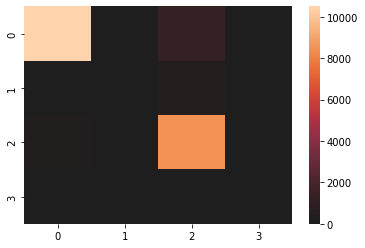

In [23]:
cfl = pickle.load(open(filename, 'rb'))
result = cfl.score(X_test, y_test)
print(result)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()